# Vinusha Sandadi
Twitter Accounts

Virat Kohli

Virender Sehwag

Sachin Tendulkar


## Pickle file creation

In [1]:
# virat_kohli

import tweepy
import pickle

from twitter_keys import consumer_key,consumer_secret,access_token,access_secret

auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

api = tweepy.API(auth)

tweets_virat = api.user_timeline('@imVkohli')

with open('virat_kohli.pkl','wb') as f:
    pickle.dump(tweets_virat,f)  
    
tweets_sehwag = api.user_timeline('@virendersehwag')

with open('sehwag_virender.pkl','wb') as f:
    pickle.dump(tweets_sehwag,f)  
    
tweets_sachin = api.user_timeline('@sachin_rt')

with open('sachin_tendulkar.pkl','wb') as f:
    pickle.dump(tweets_sachin,f)  

## Loading the pickle files

In [2]:
 #virat

import pickle
with open('virat_kohli.pkl','rb') as f:
    tweets_virat=pickle.load(f)

# sehwag
with open('sehwag_virender.pkl','rb') as f:
    tweets_sehwag=pickle.load(f)

# sachin
with open('sachin_tendulkar.pkl','rb') as f:
    tweets_sachin=pickle.load(f)



## Lexical Diversities

In [3]:
def lexical_diversity(text):
    tokens = text.lower().split()
    return len(tokens)


In [4]:
diversities_1 = []
for tweet in tweets_virat:
    diversities_1.append(lexical_diversity(tweet.text))   
print()
print("virat's diversities:",diversities_1)
#print("Minimum of virat's diversities:",min(diversities_1))
Avg1 = sum(diversities_1) / len(diversities_1)
print("virat's avg:", Avg1)


diversities_2= []
for tweet in tweets_sehwag:
    diversities_2.append(lexical_diversity(tweet.text))
print()
print("sehwag's diversities:",diversities_2)


#print("Minimum of sehwag's diversities:",min(diversities_2))

Avg2 = sum(diversities_2) / len(diversities_2)
print("sehwag's avg:", Avg2)

diversities_3 = []
for tweet in tweets_sachin:
    diversities_3.append(lexical_diversity(tweet.text))
print()
print("sachin's diversities:",diversities_3)
#print("Minimum of sachin's diversities:",min(diversities_3))
Avg3 = sum(diversities_3) / len(diversities_3)
print("sachin's avg:", Avg3)



AccntsAvg ={
  "Account1": Avg1,
  "Account2": Avg2,
  "Account3": Avg3
}


virat's diversities: [21, 8, 21, 7, 22, 9, 5, 9, 20, 9, 21, 8, 9, 16, 5, 4, 7, 21, 19, 16]
virat's avg: 12.85

sehwag's diversities: [25, 19, 22, 12, 2, 4, 21, 19, 8, 21, 21, 20, 18, 22, 14, 16, 22, 23, 15, 22]
sehwag's avg: 17.3

sachin's diversities: [21, 14, 20, 8, 17, 16, 17, 21, 24, 12, 21, 14, 17, 21, 20, 18, 24, 20, 12, 8]
sachin's avg: 17.25


## Conclusion

The above is the diversities length and average length of each person.

[17.3, 17.25, 12.85]
['Account2', 'Account3', 'Account1']


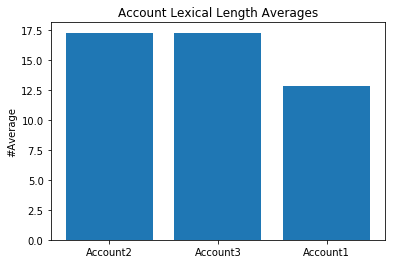

In [6]:
import matplotlib.pyplot as plt
#from matplotlib.ticker() import ScalarFormatter 

NUM_VALUES = 3

heights=list(AccntsAvg.values())
heights.sort(reverse=True)
print(heights)
plt.bar(range(3), heights)
plt.title('Account Lexical Length Averages')
plt.ylabel('#Average')
keys = list(AccntsAvg.keys())
keys.sort(reverse=True, key=lambda x: AccntsAvg[x])
print(keys)
plt.xticks(range((NUM_VALUES)),keys[:NUM_VALUES])

#plt.gca().yaxis.set_major_formatter(ScalarFormatter()) 
#plt.yscale("log") 
plt.show()


## Conclusion

The above histogram represents the average length of each individual, account2 and account3 has same length.

## Sentiment Analysis


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\s534744\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


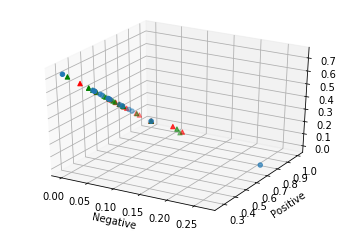

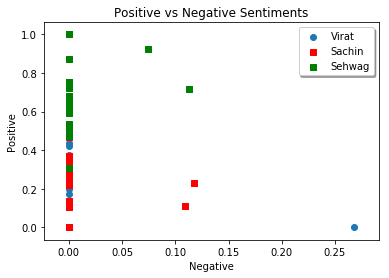

In [7]:
from nltk_helpers import get_sentiments
from nltk_helpers import split_sentiments 

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#build our figure
fig_a = plt.figure()
# build the axes
ax = fig_a.add_subplot(111, projection='3d')

sentiments = [get_sentiments(tweet.text) for tweet in tweets_virat]

# build our xs, ys, and zs
xs = []
for sent in sentiments:
    xs.append(sent['neg'])

ys = [sent['neu'] for sent in sentiments]
zs = list(map(lambda x: x['pos'], sentiments))

ax.scatter(xs, ys, zs)

#add another set of data
#nx.add_subplot(ax)


sehwagX, sehwagY, sehwagZ = split_sentiments([get_sentiments(tweet.text) for tweet in tweets_sehwag])
ax.scatter(sehwagX, sehwagY, sehwagZ, color='r', marker='^')

sachinX, sachinY, sachinZ = split_sentiments([get_sentiments(tweet.text) for tweet in tweets_sachin])
ax.scatter(sachinX, sachinY, sachinZ, color='g', marker='^')

ax.set_xlabel('Negative')
ax.set_ylabel('Neutral')
ax.set_ylabel('Positive')

print()
plt.show()
print()


plt.scatter(xs, zs, label='Virat')
plt.scatter(sehwagX, sehwagZ,color='r', marker='s', label='Sachin')
plt.scatter(sachinX, sachinY,color='g', marker='s', label='Sehwag')

plt.xlabel('Negative')
plt.ylabel('Positive')
plt.title('Positive vs Negative Sentiments')
plt.legend(loc='upper right', shadow=True)

plt.show()


## Conclusion

We can Conclude that, most of the tweets made by all the three people are all positive. Few tweets made by virat are negative compared to others.

## Devices Used

In [8]:
import collections
def devices_Used(devices):
    counter = collections.Counter(devices)
    return counter 

virat_devices = []
for tweet in tweets_virat:
    virat_devices.append(tweet.source)
print()   
print("Devices Used by Virat")
print(virat_devices)
print() 

sehwag_devices = []
for tweet in tweets_sehwag:
    sehwag_devices.append(tweet.source)
print()   
print("Devices Used by Sehwag")
print(sehwag_devices)
print() 

sachin_devices = []
for tweet in tweets_sachin:
    sachin_devices.append(tweet.source)
print()   
print("Devices Used by Sachin")
print(sachin_devices)
print() 

print("Devices Used by virat",list(devices_Used(virat_devices)))
print("Devices Used by sehwag",list(devices_Used(sehwag_devices)))
print("Devices Used by sachin",list(devices_Used(sachin_devices)))



Devices Used by Virat
['Twitter for Android', 'Twitter for Android', 'Twitter for Android', 'Twitter for Android', 'Twitter for Android', 'Twitter for Android', 'Twitter for Android', 'Twitter for Android', 'Twitter for Android', 'Twitter for Android', 'Twitter for Android', 'Twitter for Android', 'Twitter for Android', 'Twitter for Android', 'Twitter for Android', 'Twitter for Android', 'Twitter for Android', 'Twitter for Android', 'Twitter for Android', 'Twitter for Android']


Devices Used by Sehwag
['Twitter for Android', 'Twitter for iPhone', 'Twitter for iPhone', 'Twitter for iPhone', 'Twitter for iPhone', 'Twitter for iPhone', 'Twitter for iPhone', 'Twitter for iPhone', 'Twitter for iPhone', 'Twitter for iPhone', 'Twitter for Android', 'Twitter for iPhone', 'Twitter for iPhone', 'Twitter for iPhone', 'Twitter for iPhone', 'Twitter for Android', 'Twitter for iPhone', 'Twitter for iPhone', 'Twitter for iPhone', 'Twitter for Android']


Devices Used by Sachin
['Twitter for Android

## Conclusion

Twitter for android is the most commonly used device by the three people.